##### Durchführen einer einfachen Regression von zwei Features (also in zwei Dimensionen; Features-Anzahl ist aber nicht eingeschränkt), da dies sich leichter visualisieren lässt. Ziel ist es, ein Regression-Modell zu erstellen, in dem man einen numerischen Eingabe-Wert (x) eingibt und einen numerischen Ausgabe-Wert (y) erhält.

In [1]:
# Ein künstliches Datenset von 500 Datenpunkten mit Hilfe der Funktion make_regression() erzeugen
# Mit dem Parameter noise können wir angeben, wie verauscht die Daten sein sollen
# noise: float, default=0.0 ; The standard deviation of the gaussian noise applied to the output
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=20, random_state=1)

In [2]:
X_reg

array([[-1.91835552e-01],
       [-5.37223024e-01],
       [ 5.64382855e-01],
       [ 1.93752881e+00],
       [ 1.20205486e+00],
       [-2.43483776e+00],
       [ 2.10025514e+00],
       [ 1.00088142e+00],
       [-7.67309826e-01],
       [-7.77858827e-01],
       [-1.09991490e-01],
       [-4.48738033e-01],
       [ 6.74570707e-01],
       [ 1.74481176e+00],
       [-2.26314243e-01],
       [ 1.62765075e+00],
       [ 3.69492716e-01],
       [ 8.25029824e-01],
       [ 8.65407629e-01],
       [ 3.67231814e-01],
       [ 7.78211279e-02],
       [ 1.04444209e+00],
       [ 8.52704062e-01],
       [ 5.82815214e-01],
       [-6.70662286e-01],
       [ 5.92472801e-01],
       [ 4.41364444e-01],
       [-2.46169559e-02],
       [ 1.38877940e+00],
       [ 4.77610182e-01],
       [ 1.61694960e+00],
       [-7.00398505e-01],
       [ 1.62284909e+00],
       [ 1.04008915e+00],
       [ 3.86539145e-01],
       [ 2.19069973e+00],
       [ 2.11124755e-01],
       [ 8.38983414e-01],
       [-3.5

In [3]:
X_reg.shape

(500, 1)

In [4]:
y_reg.shape

(500,)

In [5]:
# Die Daten zweidimensional plotten. Die x-Achse stellt die Eingangswerte dar, die y-Achse die davon abhängigen Werte
# Mit X_reg[:, 0] wird die erste und einzige Spalte, der prinzipiell n-dimensionalen Input-Werte-Matrix genutzt
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_reg[:, 0], y_reg, ".")

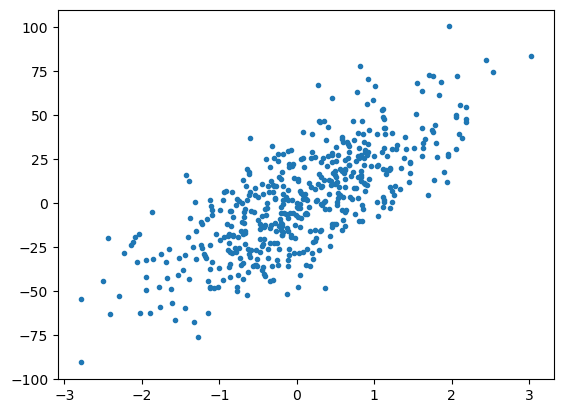

In [6]:
plt.show()

In [8]:
# Für diese Daten wird ein lineares Regression-Modell erstellt
# Dafür wird die benötigte Klasse geladen und eine Instanz davon erstellt
# Ein lineares Modell wird durch die folgende Formel beschrieben: y = w_1 * x_1 + w_2 * x_2 + … + w_n * x_n + b
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [9]:
# Daten in ein Trainings- und ein Testset für eine spätere Bewertung der Güte des Modells aufteilen
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg)

In [10]:
# Das Fitting der Parameter erfolgt mit der Methode fit()
linear_regression.fit(X_reg_train, y_reg_train)

LinearRegression()

In [13]:
# Die Koeffizienten, also in diesem Fall w_1, anzeigen
# Die Gerade hat die Steigung 21.4 (?? Resultat-Wert: 23.5)
linear_regression.coef_

array([23.59477382])

In [14]:
# Es gibt noch den y-Achsen-Abschnit bei 0 (Intercept).
linear_regression.intercept_

np.float64(0.04025180624163727)

In [15]:
# Die Trainingsdaten und die Gerade, die das lineare Modell repräsentiert, in einem Plot darstellen
plt.plot(X_reg_train, y_reg_train, ".")
y_lm_predicted = linear_regression.predict(X_reg_train)
plt.plot(X_reg_train, y_lm_predicted, ".")

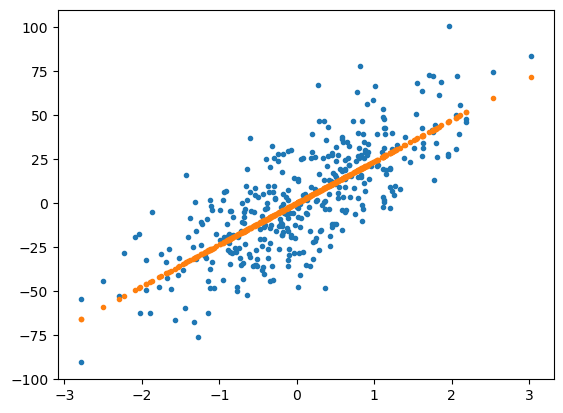

In [16]:
plt.show()

In [17]:
# Dieses trainierte Modell kann nun auf neue Werte angewandt werden (auf unseres Test-Datenset)
linear_regression.predict(X_reg_test)

array([ 50.48182152,  45.75580593,  19.482478  ,  10.92131444,
       -57.40919453, -41.50279654,  11.72465099,   1.47363894,
        15.95659506,  -4.09966287,  -5.8435858 ,  26.09299529,
        14.63079422,  -1.30050897,   7.487587  ,  -6.95892909,
        20.45934908,  15.63687598, -17.58877914,   7.69142924,
        29.20726251,  -6.54499581,   6.66248082,   4.71908885,
        33.25083975, -14.71455128,  20.71325933,  34.5096771 ,
         1.06890978,  10.70381634,  16.90555069,   3.81629026,
        -4.88856038,  44.98024323, -32.90976337,  -9.67228114,
        17.54861594,  57.83255108,  24.6836268 , -14.58852787,
        23.65582262,  -7.66343   , -45.81202441,  -4.02815275,
         0.8745653 ,  -2.38734882,  -5.57393435,   3.28928071,
        -2.36041904,  14.04560281,  -5.40635972,   2.62158368,
       -43.79841005, -15.66807547,  34.28639693,   7.47636638,
       -11.17606366, -10.50964555, -14.54218783,  28.18140981,
       -11.26535156, -19.54739477, -20.65900721, -38.08

In [18]:
# Mit der Methode score() eine Vorraussage durchführen und diese mit den y-Werten aus dem Testdatenset vergleichen, 
# um die Güte der Voraussage zu bewerten
linear_regression.score(X_reg_test, y_reg_test)

0.4748639244235634

In [19]:
# Das gleiche Vorgehen nun mit einer anderen Regression-Methode nutzen, z.B. mit der SVM-Methode
from sklearn.svm import SVR

In [20]:
svm_regression = SVR()

In [21]:
svm_regression.fit(X_reg_train, y_reg_train)

SVR()

In [24]:
svm_regression.predict(X_reg_test)

array([ 23.64437052,  25.71885729,  17.95211376,   9.38245815,
       -12.65321701, -19.54720798,  10.27756162,  -1.52869743,
        14.71273113,  -7.36915617,  -8.98262687,  22.7129444 ,
        13.38084136,  -4.55125131,   5.43671399,  -9.95238604,
        18.76594328,  14.3968701 , -16.73375885,   5.67457746,
        24.34196409,  -9.59826954,   4.47181207,   2.19784235,
        25.8563533 , -15.31675337,  18.97130938,  26.18378098,
        -1.98128413,   9.13782522,  15.6293872 ,   1.14789839,
        -8.11339719,  25.95670127, -20.35033913, -12.10171402,
        16.2322691 ,  18.7779582 ,  21.84594595, -15.24810862,
        21.16286682, -10.5392058 , -18.28171338,  -7.30055084,
        -2.19735173,  -5.67647459,  -8.74078524,   0.53875904,
        -5.64905012,  12.77511585,  -8.58906358,  -0.22779488,
       -18.94319965, -15.81793942,  26.130861  ,   5.42361328,
       -13.16430868, -12.70461974, -15.22272402,  23.84914652,
       -13.22455445, -17.54717044, -17.95841607, -20.13

In [25]:
svm_regression.score(X_reg_test, y_reg_test)

0.422022429399447